In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Настройка стиля графиков
sns.set(style="whitegrid")

In [3]:
# Загрузка данных (относительный путь)
try:
    df = pd.read_csv('../../seminars/S05/S05-hw-dataset.csv')
except FileNotFoundError:
    # Если файл лежит рядом с ноутбуком (альтернативный вариант)
    df = pd.read_csv('S05-hw-dataset.csv')

# Первичный осмотр
print("Размер датасета:", df.shape)
display(df.head())
print("\nИнфо:")
print(df.info())
print("\nСтатистика:")
display(df.describe())

# Распределение таргета
print("\nБаланс классов (default):")
print(df['default'].value_counts(normalize=True))

Размер датасета: (3000, 17)


,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1



Инфо:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score          

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000



Баланс классов (default):
default
0    0.589667
1    0.410333
Name: proportion, dtype: float64


**Наблюдения:**
1. В датасете 3000 объектов и 17 признаков.
2. Пропусков в данных нет (все non-null), все признаки числовые (int64 или float64).
3. Аномалий не обнаружено: возраст, доход и кредитный рейтинг находятся в разумных пределах.
4. Баланс классов: около 59% клиентов не имеют дефолта (класс 0) и 41% имеют дефолт (класс 1). Дисбаланс есть, но не критичный.

In [4]:
# 1. Выделяем признаки и таргет
# Удаляем технический ID и целевую переменную из признаков
X = df.drop(columns=['client_id', 'default'])
y = df['default']

# 2. Разделение на train и test
# Используем stratify=y для сохранения баланса классов
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=42, 
    stratify=y
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (2250, 15)
Размер тестовой выборки: (750, 15)


In [5]:
# Строим простейшую модель, которая всегда предсказывает мажоритарный класс (0)
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

# Предсказания
y_pred_dummy = dummy_clf.predict(X_test)
y_prob_dummy = dummy_clf.predict_proba(X_test)[:, 1]  # Вероятность класса 1

# Метрики
acc_dummy = accuracy_score(y_test, y_pred_dummy)
roc_dummy = roc_auc_score(y_test, y_prob_dummy)

print(f"Baseline Accuracy: {acc_dummy:.4f}")
print(f"Baseline ROC-AUC:  {roc_dummy:.4f}")

Baseline Accuracy: 0.5893
Baseline ROC-AUC:  0.5000


In [6]:
# Создаем пайплайн: Скейлинг -> Логистическая регрессия
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])

# Сетка параметров для перебора (коэффициент регуляризации C)
param_grid = {
    'logreg__C': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# Запуск поиска лучших параметров
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)

# Лучшая модель
best_model = grid.best_estimator_

print(f"Лучшие параметры: {grid.best_params_}")
print(f"Лучший ROC-AUC на кросс-валидации: {grid.best_score_:.4f}")

Лучшие параметры: {'logreg__C': 1.0}
Лучший ROC-AUC на кросс-валидации: 0.8632


In [7]:
# Предсказания лучшей моделью на тесте
y_pred_logreg = best_model.predict(X_test)
y_prob_logreg = best_model.predict_proba(X_test)[:, 1]

# Метрики
acc_logreg = accuracy_score(y_test, y_pred_logreg)
roc_logreg = roc_auc_score(y_test, y_prob_logreg)

print(f"Logistic Regression Accuracy: {acc_logreg:.4f}")
print(f"Logistic Regression ROC-AUC:  {roc_logreg:.4f}")

# Сводная таблица результатов
results = pd.DataFrame({
    'Model': ['Baseline (Dummy)', 'Logistic Regression'],
    'Accuracy': [acc_dummy, acc_logreg],
    'ROC-AUC': [roc_dummy, roc_logreg]
})

display(results)

Logistic Regression Accuracy: 0.7933
Logistic Regression ROC-AUC:  0.8647


,Model,Accuracy,ROC-AUC
0,Baseline (Dummy),0.589333,0.500000
1,Logistic Regression,0.793333,0.864709


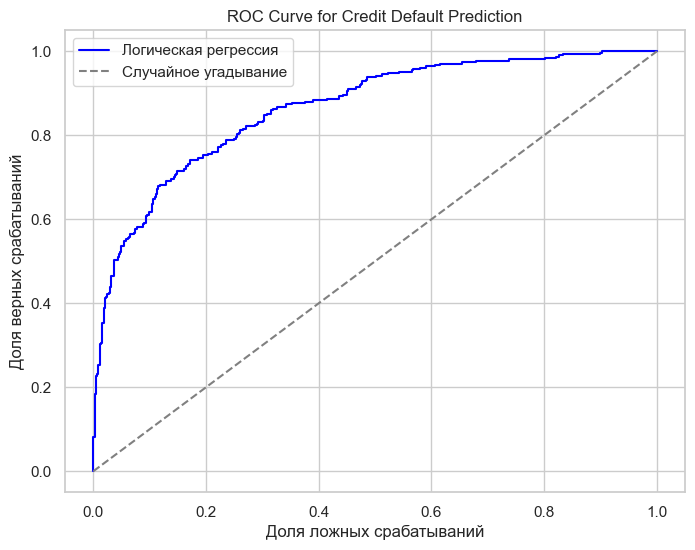

In [8]:
# Вычисляем координаты ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logreg)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_logreg:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

plt.title('ROC Curve for Credit Default Prediction')
plt.xlabel('Доля ложных срабатываний')
plt.ylabel('Доля верных срабатываний')
plt.legend(['Логическая регрессия', 'Случайное угадывание'])
plt.grid(True)

# Сохранение графика в папку figures (убедитесь, что папка создана)
plt.savefig('figures/roc_curve.png')
plt.show()

## Итоговый отчет

В ходе эксперимента мы сравнили бейзлайн-модель (DummyClassifier) и логистическую регрессию.

1. **Бейзлайн**: 
   - Просто предсказывая "дефолта не будет" (класс 0), мы получаем Accuracy около **0.59**.
   - Однако ROC-AUC такой модели равен **0.5**, что говорит о полной неспособности ранжировать клиентов по риску.

2. **Логистическая регрессия**:
   - После подбора гиперпараметра `C` (лучшее значение `C=1.0`) качество значительно выросло.
   - **Accuracy** выросла до **~0.79** (+20% к бейзлайну).
   - **ROC-AUC** составил **~0.86**, что является хорошим показателем. Модель уверенно отличает надежных заемщиков от ненадежных.

**Вывод**: Использование линейной модели оправдано. Признаки (доход, скоринг, долги) имеют высокую предсказательную силу, позволяя банку выявлять потенциальные дефолты значительно лучше случайного гадания.